# 1. Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 2. Data Inspection

In [2]:
# load the data
df = pd.read_csv('data.csv')

# inspect the first few rows of the dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# inspect the date feature
df.date.min(),df.date.max()

('2014-05-02 00:00:00', '2014-07-10 00:00:00')

It looks like the **date** feature represents when data about the properties were collected, which was between May and July, 2014. We can drop this column as it won't contribute to our anaysis.

In [4]:
df.drop('date',axis=1,inplace=True)

All the houses in the dataset are located in Washington so we can extract only the zip codes

In [5]:
df['zip'] = df.statezip.str.split(expand=True)[1]
df.drop('statezip',axis=1,inplace=True)

Let's see the countries represented in the dataset

In [6]:
df.country.unique()

array(['USA'], dtype=object)

The **country** column does not give any additional information since our dataset contains only records of houses in USA.  

In [7]:
# drop country column
df.drop('country',axis=1,inplace=True)

Let's get a summary of our data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  zip            4600 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 575.1+ KB


The dataset now contains 4600 rows and 17 columns with no missing values. Let's get a summary of our numerical features

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The minimum price is zero dollar. Our model could learn spurious patterns based on these entries.

How many houses cost $0? 

In [10]:
len(df[df.price==0])

49

We wouldn't be throwing away much information by removing these records.

In [11]:
drop = df[df.price==0].index
df.drop(drop,inplace=True)

We have barely scratched the surface. Let's split our data before doing EDA

In [12]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.25,random_state=42)

# reset the index of the train and test sets
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

train.shape, test.shape

((3413, 16), (1138, 16))

# 3. Exploratory Data Analysis (EDA)

Before  proceeding, we'll create a copy of our train set. 

In [13]:
# create a copy of train set
housing = train.copy()

# inspect random rows from train set
housing.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,zip
1694,773000.0,3.0,2.75,2470,3600,2.0,0,0,3,2470,0,2007,0,1458-1462 29th Pl NE,Issaquah,98029
364,375000.0,2.0,2.50,750,1430,2.0,0,0,3,750,0,2006,0,1700 E Columbia St,Seattle,98122
3343,495000.0,3.0,3.50,2380,6250,2.0,0,3,3,1670,710,1997,0,6521-6599 S Norfolk St,Seattle,98118
422,599950.0,4.0,3.50,2500,3080,2.0,0,0,3,1810,690,2008,0,7928 150th Ct NE,Redmond,98052
1769,480000.0,3.0,2.50,1250,1103,3.0,0,2,3,1250,0,2005,0,513 N 46th St,Seattle,98103


Let's see the distribution of the features

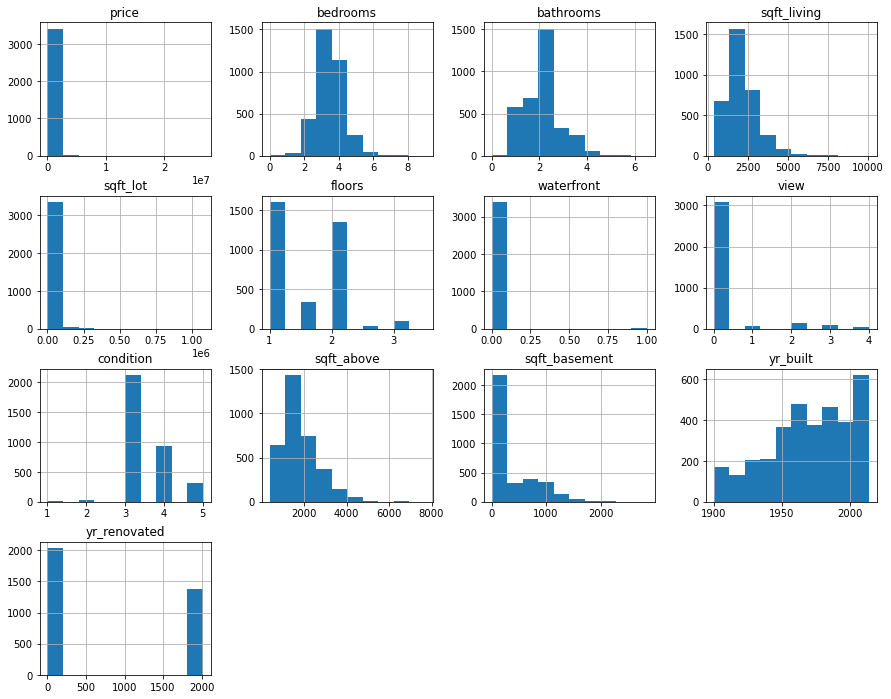

In [14]:
housing.hist(figsize=(15,12));

- Some variables have greater magnitude and wide ranges than others. Scaling these variables gives each variable equal importance in predicting the target  
  
  
- Some of the variables are heavily skewed. Normalizing these variables gives them a more bell-shaped distribuition


- More specifically, there's a spike at zero for some features. This could be because some houses lack these facilities and/or were not renovated. We can create columns to indicate this information (e.g **has_basement**).
  
  
- More houses were built as the years went by. 

What features affect **price** the most and how?

In [15]:
# check for correlations
housing.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.398797
sqft_above       0.344411
bathrooms        0.300575
view             0.208062
bedrooms         0.183622
sqft_basement    0.178289
floors           0.142283
waterfront       0.118383
condition        0.046663
sqft_lot         0.040218
yr_built         0.018002
yr_renovated    -0.031574
Name: price, dtype: float64

- Most features affect price positively with **sqft_living** showing the strongest positive relationship

- Only **yr_renovated** shows a negative relationship with price

Let's visualize the relationships between some of these features and price

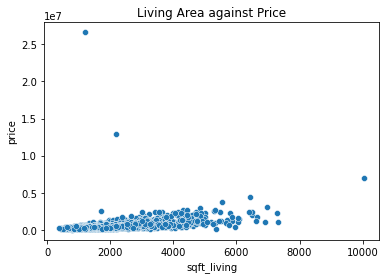

In [16]:
sns.scatterplot(x='sqft_living',y='price',data=housing)
plt.title('Living Area against Price');

The two outlier prices have squished our visualization. We'll exclude these points from our visualizations

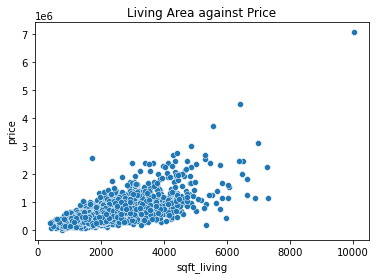

In [17]:
sns.scatterplot(x='sqft_living',y='price',data=housing[housing.price<10**7])
plt.title('Living Area against Price');

The house with largest living area costs the most

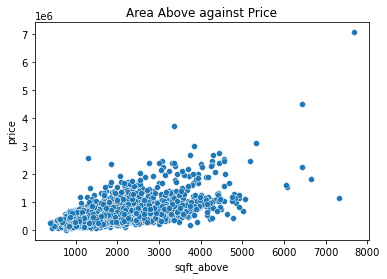

In [18]:
sns.scatterplot(x='sqft_above',y='price',data=housing[housing.price<10**7])
plt.title('Area Above against Price');

It happens that the house with the largest area above costs the most. This could be the same house that has the largest living area. It is possible that **sqft_living** and **sqft_above** are correlated

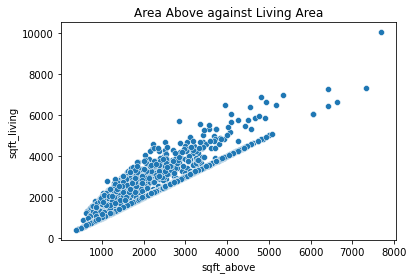

In [19]:
sns.scatterplot(x='sqft_above',y='sqft_living',data=housing[housing.price<10**7])
plt.title('Area Above against Living Area');

Unsuprisingly, there's a strong positive relationship between these two features

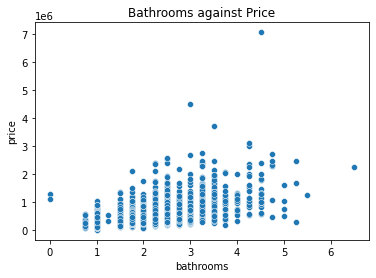

In [20]:
sns.scatterplot(x='bathrooms',y='price',data=housing[housing.price<10**7])
plt.title('Bathrooms against Price');

Although not strong, the number of bathrooms affects house price positively. However, the most expensive houses have between 3 to 5 bathrooms.

Now let's see how categorical features affect house prices

In [21]:
# handpick some categorical attributes
categories = ['yr_built','yr_renovated','waterfront','view','condition','city']

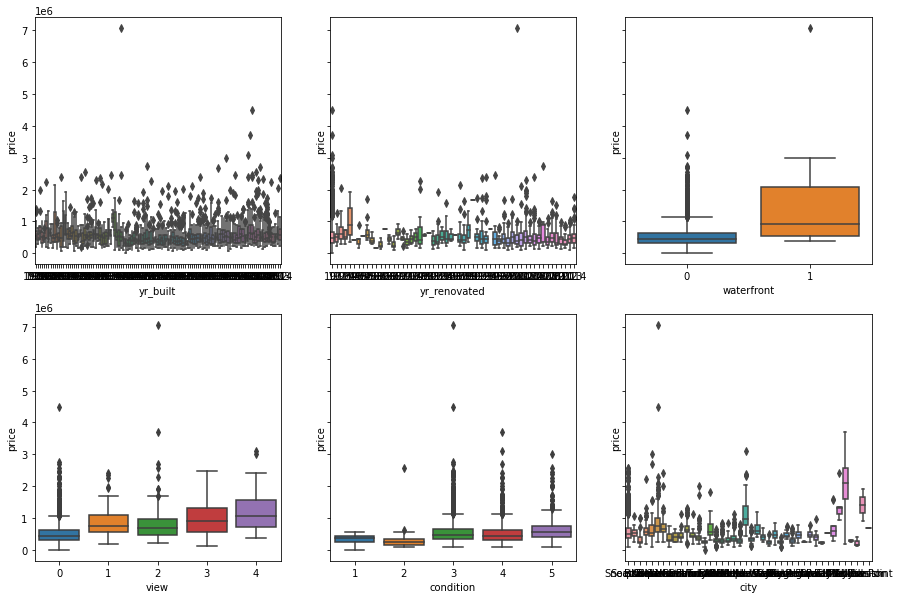

In [22]:
# to create a dashboard for the boxplots
f,axes=plt.subplots(2,3, sharey=True, figsize=(15,10))

# to plot the boxplots on the dashboard
for i in range(len(categories)):
    row = i//3
    col = i%3
    sns.boxplot(x=categories[i],y='price',data=housing[housing.price<10**7],ax = axes[row,col] )

There seems to be a slight relationship between price and most of the categorical variables

# Data Preprocessing

## Outliers

Firstly, let's check for and remove outliers

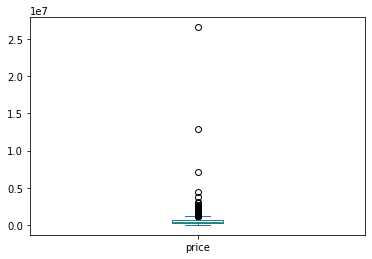

In [23]:
train.price.plot(kind='box');

Let's remove the two extreme values

In [24]:
# get the index of the outliers
outliers = train[train.price>10**7].index

# remove outliers
train.drop(outliers,inplace=True)

# reset index
train.reset_index(drop=True,inplace=True)

# confirm the absence of outliers
(train.price>10**7).sum()

0

## Feature Extraction and Engineering

We should engineer some features before scaling and encoding

In the EDA process, some variables had a spike at zero which could indicate the absence of a value or a unique category.

In [25]:
(train==0).sum().sort_values(ascending=False)

waterfront       3391
view             3085
yr_renovated     2036
sqft_basement    2035
bedrooms            2
bathrooms           2
price               0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_above          0
yr_built            0
street              0
city                0
zip                 0
dtype: int64

- **waterfront** and **view** are categorical variables so, a zero value could represent a unique category. A zero value in **sqft_basemnt** could indicate the absence of a basement while for **yr_renovated**, it could indicate that a house was not renovated. Hence, we'll only create indicator variable for **sqft_basement** and **yr_renovated**


- We'll also combine some promising features and target encode the city and statezip feature. 

In [26]:
train['has_basement'] = (train.sqft_basement!=0).astype(int)
train['was_renovated'] = (train.yr_renovated!=0).astype(int)

test['has_basement'] = (test.sqft_basement!=0).astype(int)
test['was_renovated'] = (test.yr_renovated!=0).astype(int)

According to Wikipedia, the first digit of a zip code represents the state ('9' corresponds to Washington), the second and third digits represent the region (or perhaps a large city) while the last two digits represent the the area of the city(for metropolitan areas) or a village/town (outside metro areas). 

Let's create a region column:

In [27]:
# to check the unique regions in the data
set([code[1:3] for code in train['zip'].unique()])

{'80', '81', '82', '83'}

In [28]:
regions = {'80':'1','81':'2','82':'3','83':'4'}

# to extract the second and third digits of the codes
train_codes = train.zip.apply(lambda x: x[1:3])
test_codes = test.zip.apply(lambda x: x[1:3])

# to map each code to their respective regions
train['region'] = train_codes.map(regions)
test['region'] = test_codes.map(regions)

Let's inspect the street column

In [29]:
train[['street']].sample(10)

,street
2412,419 Federal Ave E
392,15418 216th Ave NE
2381,2955 36th Ave S
2207,10304 Interlake Ave N
2163,20147 SE 152nd St
744,14575 NE 57th St
2103,4327 243rd Ave SE
1483,6730 SE 5th St
181,12145 SE 260th Pl
1,8502 Interlake Ave N


We can extract the quadrant and road type from this column

In [30]:
# extract quadrants
train['quadrant'] = train.street.apply(lambda x: 'NW' if 'NW' in x.split()
                                else 'NE' if 'NE' in x.split()
                                else 'SE' if 'SE' in x.split()
                                else 'SW' if 'SW' in x.split()
                                else 'UNKNOWN')

test['quadrant'] = train.street.apply(lambda x: 'NW' if 'NW' in x.split()
                                else 'NE' if 'NE' in x.split()
                                else 'SE' if 'SE' in x.split()
                                else 'SW' if 'SW' in x.split()
                                else 'UNKNOWN')


# extract road types
train['road_type'] = train.street.apply(lambda x: 'Rd' if ('Rd' in x.split()) or ('Road' in x.split())
                            else 'Way' if 'Way' in x.split()
                            else 'St' if ('St' in x.split()) or ('Street' in x.split())
                            else 'Ave' if ('Ave' in x.split()) or ('Avenue' in x.split())
                            else 'Blvd' if ('Blvd' in x.split()) or ('Boulevard' in x.split())
                            else 'Ln' if ('Ln' in x.split()) or ('Lane' in x.split())
                            else 'Dr' if ('Dr' in x.split()) or ('Drive' in x.split())
                            else 'Pl' if ('Pl' in x.split()) or ('Place' in x.split())
                            else 'Ct' if ('Ct' in x.split()) or ('Court' in x.split())
                            else 'Pkwy' if ('Pkwy' in x.split()) or ('Parkway' in x.split())
                            else 'Hwy' if 'Hwy' in x.split()
                            else 'Terrace' if 'Terrace' in x.split()
                            else 'Trail' if 'Trail' in x.split()
                            else 'Cir' if 'Cir' in x.split()
                            else 'Walk' if 'Walk' in x.split()
                            else 'Key' if 'Key' in x.split()
                            else 'UNKNOWN')

test['road_type'] = test.street.apply(lambda x: 'Rd' if ('Rd' in x.split()) or ('Road' in x.split())
                            else 'Way' if 'Way' in x.split()
                            else 'St' if ('St' in x.split()) or ('Street' in x.split())
                            else 'Ave' if ('Ave' in x.split()) or ('Avenue' in x.split())
                            else 'Blvd' if ('Blvd' in x.split()) or ('Boulevard' in x.split())
                            else 'Ln' if ('Ln' in x.split()) or ('Lane' in x.split())
                            else 'Dr' if ('Dr' in x.split()) or ('Drive' in x.split())
                            else 'Pl' if ('Pl' in x.split()) or ('Place' in x.split())
                            else 'Ct' if ('Ct' in x.split()) or ('Court' in x.split())
                            else 'Pkwy' if ('Pkwy' in x.split()) or ('Parkway' in x.split())
                            else 'Hwy' if 'Hwy' in x.split()
                            else 'Terrace' if 'Terrace' in x.split()
                            else 'Trail' if 'Trail' in x.split()
                            else 'Cir' if 'Cir' in x.split()
                            else 'Walk' if 'Walk' in x.split()
                            else 'Key' if 'Key' in x.split()
                            else 'UNKNOWN')

In [31]:
train.road_type.value_counts()

Ave        1476
St          861
Pl          591
Ct          130
Way         107
Dr           94
Rd           51
Ln           33
Blvd         21
Terrace       9
UNKNOWN       9
Trail         8
Cir           6
Walk          5
Hwy           4
Pkwy          4
Key           2
Name: road_type, dtype: int64

In [32]:
train.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'zip', 'has_basement',
       'was_renovated', 'region', 'quadrant', 'road_type'],
      dtype='object')

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler
from category_encoders import TargetEncoder

class Add_attr(BaseEstimator,TransformerMixin):
    
    def __init__(self,m=1):
        self.m = m
        self.encoder1 = TargetEncoder(smoothing=m)
        self.encoder2 = TargetEncoder(smoothing=m)
    def fit(self,X,y=None):
        X_enc = X[['city','zip','quadrant','road_type','region']].copy()
        y_enc1 = X.sqft_living
        y_enc2 = X.sqft_lot
        self.encoder1.fit(X_enc,y_enc1)
        self.encoder2.fit(X_enc,y_enc2)
        self.columns = ['total_rooms','livarea/bedroom','lotarea/bedroom','livarea/bathroom',
                        'lotarea/bathroom','land_space','total_space','landspace/room',
                        'totspace/room','facilities','score','sqft_city','sqft_zip',
                        'sqft_quadrant','sqft_roadtype','sqft_region','lot_city','lot_zip',
                        'lot_quadrant','lot_roadtype','lot_region']
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        df['total_rooms'] = df['bedrooms']+df['bathrooms']
        df['livarea/bedroom'] = df['sqft_living']/df['bedrooms']
        df['lotarea/bedroom'] = df['sqft_lot']/df['bedrooms']
        df['livarea/bathroom'] = df['sqft_living']/df['bathrooms']
        df['lotarea/bathroom'] = df['sqft_lot']/df['bathrooms']
        df['land_space'] = df['sqft_living']+df['sqft_lot']
        df['total_space'] = df['sqft_living']+df['sqft_lot']+df['sqft_above']+df['sqft_basement']
        df['landspace/room'] = df['land_space']/df['total_rooms']
        df['totspace/room'] = df['total_space']/df['total_rooms']
        df['facilities'] =df.apply(lambda x:int(x.bedrooms!=0)+int(x.bathrooms!=0)+int(x.view!=0)
                                         +int(x.waterfront!=0)+int(x.sqft_basement!=0),axis=1)
        df['score'] = df['facilities']*df['condition']
        df[['sqft_city','sqft_zip','sqft_quadrant','sqft_roadtype','sqft_region']] = self.encoder1.transform(df[['city','zip','quadrant','road_type','region']])
        df[['lot_city','lot_zip','lot_quadrant','lot_roadtype','lot_region']] = self.encoder2.transform(df[['city','zip','quadrant','road_type','region']])
        df = df.replace(np.inf,dict(df.median()))
        return df

In [34]:
# create a list of the newly added attributes
extra_attr = ['total_rooms','livarea/bedroom','lotarea/bedroom',
 'livarea/bathroom','lotarea/bathroom','land_space','total_space','landspace/room',
 'totspace/room','facilities','score','sqft_city','sqft_zip','sqft_quadrant','sqft_roadtype',
'sqft_region','lot_city','lot_zip','lot_quadrant','lot_roadtype','lot_region']

In [35]:
new_feats=Add_attr().fit_transform(train)
new_feats

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,sqft_city,sqft_zip,sqft_quadrant,sqft_roadtype,sqft_region,lot_city,lot_zip,lot_quadrant,lot_roadtype,lot_region
0,635000.000000,3.0,2.50,2300,5500,1.5,0,0,4,2000,...,1833.560976,1910.955882,1925.379668,2003.008130,1830.519048,5301.785534,4287.705882,7605.679461,13366.500000,6399.424490
1,405000.000000,3.0,2.25,1520,1245,3.0,0,0,3,1520,...,1833.560976,1792.727273,1925.379668,2003.008130,1830.519048,5301.785534,3388.809091,7605.679461,13366.500000,6399.424490
2,567500.000000,3.0,2.50,2300,7398,2.0,0,0,3,2300,...,2597.115385,2597.115385,2381.686532,2003.008130,2346.380165,20398.442308,20398.442308,23547.878427,13366.500000,20986.932335
3,359000.000000,5.0,1.75,1940,6654,1.5,0,0,4,1940,...,1735.545455,1858.690476,1798.007812,2003.008130,1830.519048,12541.436364,14899.880952,12659.505208,13366.500000,6399.424490
4,494815.000000,3.0,2.50,1910,2091,2.0,0,0,3,1910,...,2420.278571,2302.333333,2261.966169,2433.848485,2346.380165,27904.314286,11239.015152,16726.231841,14421.181818,20986.932335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,108333.333333,3.0,1.00,1200,9936,1.0,0,0,4,1200,...,2092.405063,2092.405063,2381.686532,2064.859466,2346.380165,15057.303797,15057.303797,23547.878427,15436.173055,20986.932335
3407,875000.000000,4.0,2.00,2520,6000,1.0,0,0,3,1400,...,1833.560976,1792.727273,1925.379668,2003.008130,1830.519048,5301.785534,3388.809091,7605.679461,13366.500000,6399.424490
3408,290000.000000,3.0,1.00,1150,8145,1.0,0,0,4,990,...,1776.701031,1701.369863,2261.966169,2003.008130,1830.519048,8898.969072,9685.205479,16726.231841,13366.500000,6399.424490
3409,600000.000000,2.0,1.00,910,2002,1.5,0,0,3,910,...,1833.560976,2327.735849,1925.379668,2003.008130,1830.519048,5301.785534,4635.000000,7605.679461,13366.500000,6399.424490


## Feature Scaling

In [36]:
# select the numerical attributes
num_attr = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above', 
            'sqft_basement','yr_built', 'yr_renovated']

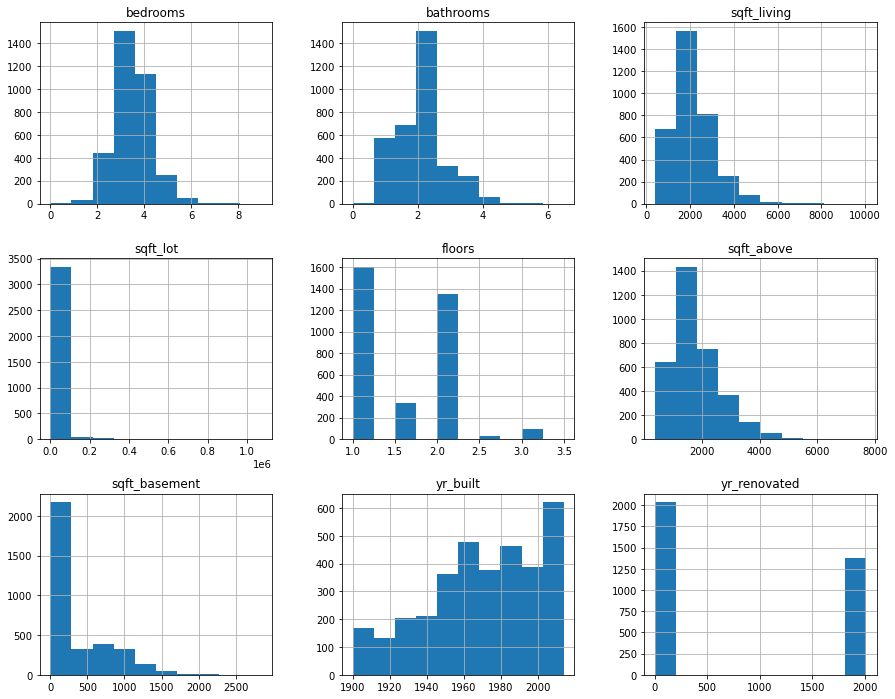

In [37]:
new_feats[num_attr].hist(figsize=(15,12));

- Some variables have greater magnitude and wide ranges than others. Scaling these variables would give each variable equal importance in predicting the target  
  
  
- There are also heavily skewed variables. Normalizing these variables would give them a more bell-shaped distribuition


In [38]:
abs(new_feats[num_attr].skew()).sort_values(ascending=False)

sqft_lot         12.240781
sqft_above        1.379009
sqft_basement     1.360537
sqft_living       1.355652
floors            0.539768
yr_built          0.493052
bedrooms          0.459156
bathrooms         0.418823
yr_renovated      0.395788
dtype: float64

The area variables are highly skewed. We'll log-transform them. However, we'll only scale the year variables

In [39]:
class Scale_num(BaseEstimator,TransformerMixin):
    to_normalize = ['sqft_lot','sqft_above','sqft_basement','sqft_living']
    to_scale = ['yr_built','yr_renovated']
    others = ['floors','bedrooms', 'bathrooms']
    columns = ['sqft_lot','sqft_above','sqft_basement','sqft_living','yr_built','yr_renovated',
               'floors','bedrooms', 'bathrooms']
    def __init__(self):
        self.ss = StandardScaler()
    
    def fit(self,X,y=None):
        df = X.copy()
        self.ss.fit(df[self.to_scale])
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        normed = np.log1p(df[self.to_normalize]).values
        scaled = self.ss.transform(df[self.to_scale])
        rem = df[self.others].values
        data = np.c_[normed,scaled,rem]
        df = pd.DataFrame(data,columns=self.columns)
        return df

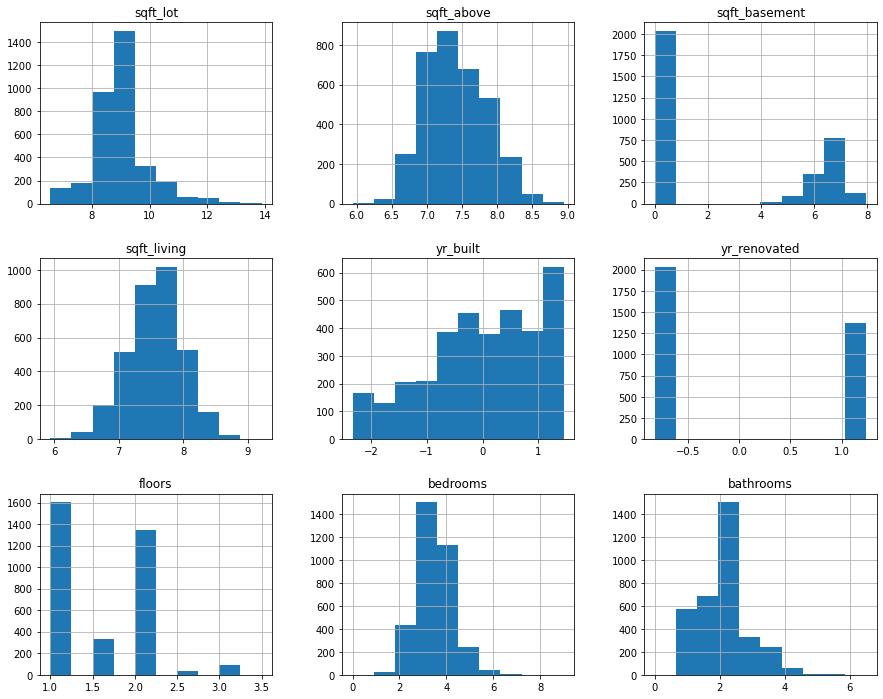

In [40]:
Scale_num().fit_transform(new_feats[num_attr]).hist(figsize=(15,12));

Let's check the distributions of the newly created features

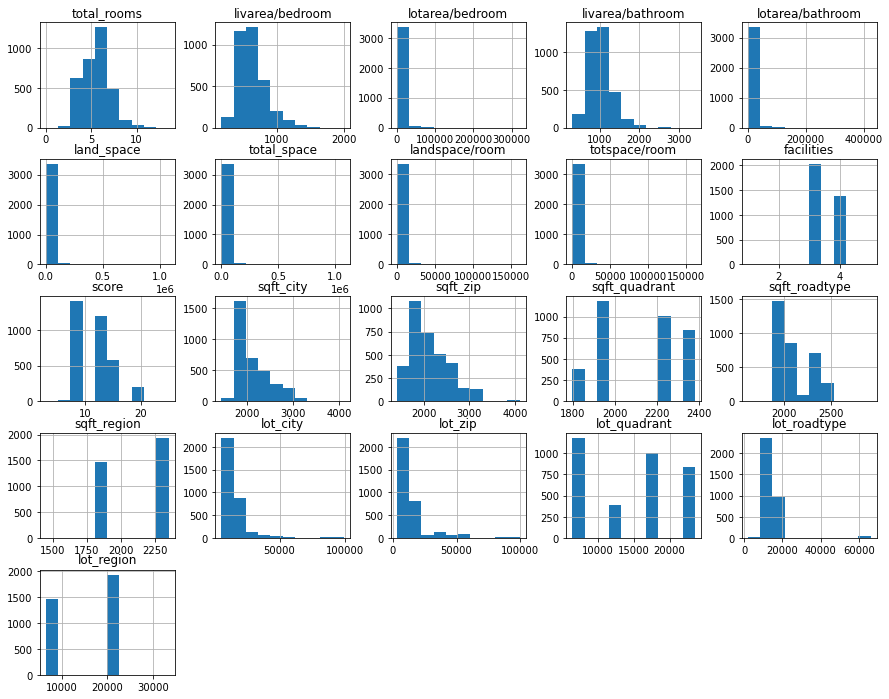

In [41]:
new_feats[extra_attr].hist(figsize=(15,12));

The possible features for normalizing and scaling are evident

In [42]:
abs(new_feats[extra_attr].skew()).sort_values(ascending=False)

lotarea/bedroom     12.728910
land_space          12.113808
lotarea/bathroom    11.988092
total_space         11.968980
landspace/room      11.719203
totspace/room       11.659600
lot_roadtype         7.344425
lot_city             3.445947
lot_zip              3.018131
sqft_city            1.348363
livarea/bedroom      1.224625
livarea/bathroom     1.083934
sqft_roadtype        1.022186
score                0.975144
sqft_zip             0.853618
facilities           0.373973
total_rooms          0.319043
sqft_region          0.286228
lot_region           0.264743
sqft_quadrant        0.136696
lot_quadrant         0.135498
dtype: float64

In [43]:
class Scale_extra(BaseEstimator,TransformerMixin):
    to_normalize = ['lotarea/bedroom','land_space','lotarea/bathroom','total_space',
                   'landspace/room','totspace/room','lot_roadtype','lot_city','lot_zip',
                    'sqft_city','livarea/bedroom','livarea/bathroom','sqft_roadtype']
    to_scale = ['sqft_zip','sqft_region','lot_region','sqft_quadrant','lot_quadrant']
    others = ['score','facilities','total_rooms']
    columns =['lotarea/bedroom','land_space','lotarea/bathroom','total_space','landspace/room',
               'totspace/room','lot_roadtype','lot_city','lot_zip','sqft_city',
               'livarea/bedroom','livarea/bathroom','sqft_roadtype','sqft_zip','sqft_region',
               'lot_region','sqft_quadrant','lot_quadrant','score','facilities','total_rooms']
    def __init__(self):
        self.ss = StandardScaler()
    def fit(self,X,y=None):
        df = X.copy()
        self.ss.fit(df[self.to_scale])
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        normed = np.log1p(df[self.to_normalize])
        scaled = self.ss.transform(df[self.to_scale])
        rem = df[self.others]
        data = np.c_[normed,scaled,rem]
        df = pd.DataFrame(data,columns=self.columns)
        return df

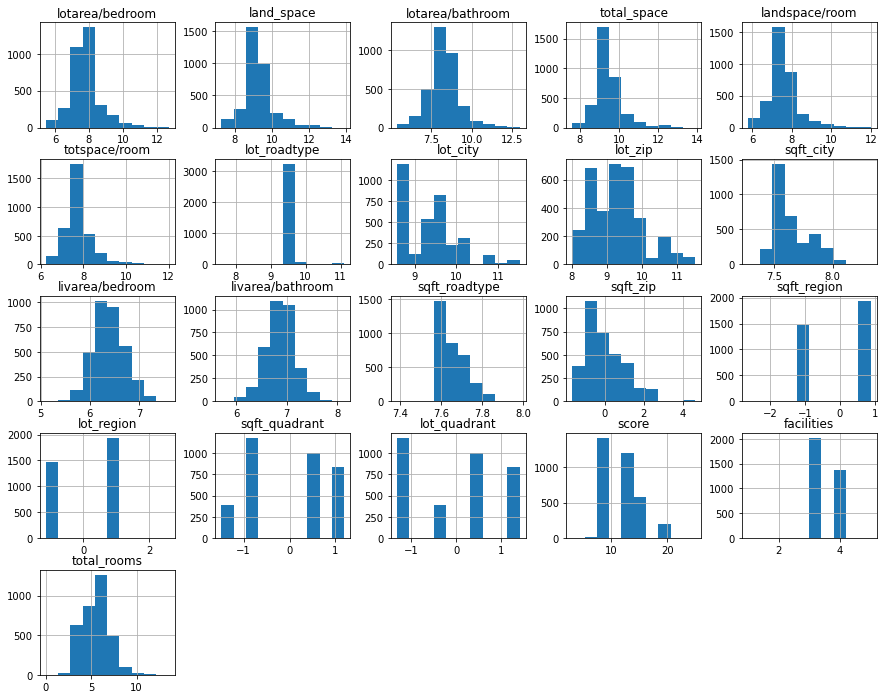

In [44]:
Scale_extra().fit_transform(new_feats[extra_attr]).hist(figsize=(15,12));

## Encoding Categories

In [45]:
# select categorical attributes
cat_attr = ['waterfront','view','condition','city','zip','has_basement','was_renovated','region','quadrant','road_type']
for attr in cat_attr:
    print(attr, new_feats[attr].unique())

waterfront [0 1]
view [0 2 1 4 3]
condition [4 3 5 2 1]
city ['Seattle' 'Snoqualmie' 'Burien' 'Issaquah' 'Kirkland' 'Bellevue'
 'Sammamish' 'Carnation' 'Black Diamond' 'Kenmore' 'Redmond'
 'Normandy Park' 'Shoreline' 'Tukwila' 'Woodinville' 'Kent' 'Auburn'
 'Des Moines' 'Renton' 'Federal Way' 'Mercer Island' 'Maple Valley'
 'Newcastle' 'North Bend' 'SeaTac' 'Vashon' 'Covington' 'Bothell'
 'Enumclaw' 'Ravensdale' 'Algona' 'Lake Forest Park' 'Duvall' 'Pacific'
 'Snoqualmie Pass' 'Fall City' 'Clyde Hill' 'Medina' 'Milton' 'Skykomish'
 'Yarrow Point' 'Preston']
zip ['98144' '98103' '98065' '98166' '98029' '98034' '98004' '98074' '98107'
 '98106' '98005' '98014' '98006' '98010' '98028' '98053' '98126' '98118'
 '98102' '98052' '98133' '98178' '98146' '98077' '98112' '98030' '98117'
 '98002' '98198' '98059' '98033' '98023' '98042' '98040' '98136' '98155'
 '98115' '98092' '98038' '98116' '98045' '98188' '98058' '98108' '98003'
 '98027' '98070' '98031' '98072' '98075' '98199' '98011' '98022' '9

We can deduce that **waterfront**, **has_basement**, and **was_renovated** are ordinal variables. The remaining variables are nominal and have to be dummy encoded(i.e a column for each unique value)

Let's create a Custom Transformer to encode these variables

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class Encode(BaseEstimator,TransformerMixin):
    ordinal = ['waterfront','has_basement','was_renovated']
    nominal = ['view','condition','city','zip','region','quadrant','road_type']

    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
    
    def fit(self,X,y=None):
        self.encoder.fit(X[self.nominal])
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        dummy_data = self.encoder.transform(df[self.nominal])
        self.dummy_cols = self.encoder.get_feature_names(self.nominal)
        dummy_df = pd.DataFrame(dummy_data,columns=self.dummy_cols)
        ord_df = df[self.ordinal].reset_index(drop=True)
        cat_df = pd.concat([ord_df,dummy_df],axis=1)
        self.columns = cat_df.columns
        return cat_df

In [47]:
dummy_cols = Encode().fit_transform(new_feats[cat_attr]).head().columns

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_and_cat = ColumnTransformer([('num_scaler',Scale_num(),num_attr),
                                 ('extra_scaler',Scale_extra(),extra_attr),
                                 ('encoder',Encode(),cat_attr)])

preprocessor = Pipeline([('adder',Add_attr()),
                         ('scaler_encoder',num_and_cat)])

In [49]:
all_feats = Scale_num.columns+Scale_extra.columns+list(dummy_cols)
X = pd.DataFrame(preprocessor.fit_transform(train),columns=all_feats)
X

,sqft_lot,sqft_above,sqft_basement,sqft_living,yr_built,yr_renovated,floors,bedrooms,bathrooms,lotarea/bedroom,...,road_type_Ln,road_type_Pkwy,road_type_Pl,road_type_Rd,road_type_St,road_type_Terrace,road_type_Trail,road_type_UNKNOWN,road_type_Walk,road_type_Way
0,8.612685,7.601402,5.707110,7.741099,-1.632185,-0.821717,1.5,3.0,2.50,7.514436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.127694,7.327123,0.000000,7.327123,1.125392,1.225381,3.0,3.0,2.25,6.030685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.909100,7.741099,0.000000,7.741099,1.025721,-0.821717,2.0,3.0,2.50,7.810758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.803124,7.570959,0.000000,7.570959,-0.569022,1.204941,1.5,5.0,1.75,7.194287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.645876,7.555382,0.000000,7.555382,1.457630,-0.821717,2.0,3.0,2.50,6.548219,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,9.204020,7.090910,0.000000,7.090910,-0.037441,-0.821717,1.0,3.0,1.00,8.105609,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3407,8.699681,7.244942,7.021976,7.832411,-1.632185,1.229469,1.0,4.0,2.00,7.313887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3408,9.005282,6.898715,5.081404,7.048386,-1.266723,1.179390,1.0,3.0,1.00,7.906915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3409,7.602401,6.814543,0.000000,6.814543,-2.329885,1.227425,1.5,2.0,1.00,6.909753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Model Training and Evaluation

In [50]:
# seperate features from target
X_train = train.drop('price',axis=1)
y_train = train.price

X_test = test.drop('price',axis=1)
y_test = test.price

We can proceed to training and evaluating machine learning models on our preprocessed data.

In [51]:
# import some models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# import the evaluation function
from sklearn.metrics import mean_absolute_error as mae

In [52]:
# create a list of models
models = [LinearRegression(),
          Lasso(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          ExtraTreesRegressor(random_state=42),
          GradientBoostingRegressor(random_state=42),
          AdaBoostRegressor(random_state=42),
          XGBRegressor(random_state=42),
          LGBMRegressor(random_state=42),
          CatBoostRegressor(random_state=42,verbose=0)
         ]

Let's get the train scores

In [53]:
prepared_train = preprocessor.fit_transform(X_train)
train_target = y_train

for model in models:
    model.fit(prepared_train,train_target)
    train_predictions = model.predict(prepared_train)
    print(f'{model.__class__.__name__}: {mae(train_target,train_predictions)}') 

LinearRegression: 101375.44289114366
Lasso: 102455.3847611568
DecisionTreeRegressor: 16.41747288185283
RandomForestRegressor: 34948.74352174816
ExtraTreesRegressor: 16.476106713581263
GradientBoostingRegressor: 79733.63078143838
AdaBoostRegressor: 252132.59471804963
XGBRegressor: 29651.40488846086
LGBMRegressor: 54384.23401071202
CatBoostRegressor: 48440.37792454316


Let's get the average validation scores using cross validation

In [54]:
# import the cross validation
from sklearn.model_selection import cross_val_score

# calculate mae for each model
for model in models:
    pipeline = Pipeline([('preprocessor',preprocessor),('model',model)])
    scores = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    scores = np.abs(scores)
    print(f'{model.__class__.__name__}:\n\tMEAN: {np.mean(scores)}\n\tSTD: {np.std(scores)}')

LinearRegression:
	MEAN: 13355541304821.607
	STD: 26525205018846.93
Lasso:
	MEAN: 108917.24712475386
	STD: 4243.158079357143
DecisionTreeRegressor:
	MEAN: 135980.39943770078
	STD: 6022.540994931837
RandomForestRegressor:
	MEAN: 97170.08489947331
	STD: 3728.1853913664654
ExtraTreesRegressor:
	MEAN: 93734.30048203742
	STD: 5584.955773107257
GradientBoostingRegressor:
	MEAN: 100391.94053740609
	STD: 3209.106875350519
AdaBoostRegressor:
	MEAN: 228382.2222286365
	STD: 28500.55157355399
XGBRegressor:
	MEAN: 97279.92551242902
	STD: 4652.1556633009895
LGBMRegressor:
	MEAN: 94065.1215594985
	STD: 1871.2807495141988
CatBoostRegressor:
	MEAN: 87757.4804694937
	STD: 5015.2666482310815


The boosting algorithms perform better than others with **CatBoostRegressor** performing the best

Linear Regressor underfits very badly

Lasso and AdaBoost Regressor do not perform so well on both train and validation data. This is a sign of underfitting.

Underfitting occurs when the model fails to capture relevant patterns. Possible solutions include: Adding relevant features like Polynomial features or Trying out complex models

Decision Tree and Extra Tree, on the other hand, do not look as shiny as they did on the train set. Infact, Decision Tree performs worse than the linear models on unseen data. This is a sign of overfitting. The remaining boosting algorithms are also overfitting

Overfitting occurs when the model captures spurious patterns. Possible solutions include: Constraining the model, reducing noise in the data or gathering more training data.

Let's visualize the most important price predictors with Catboostr's feature importance

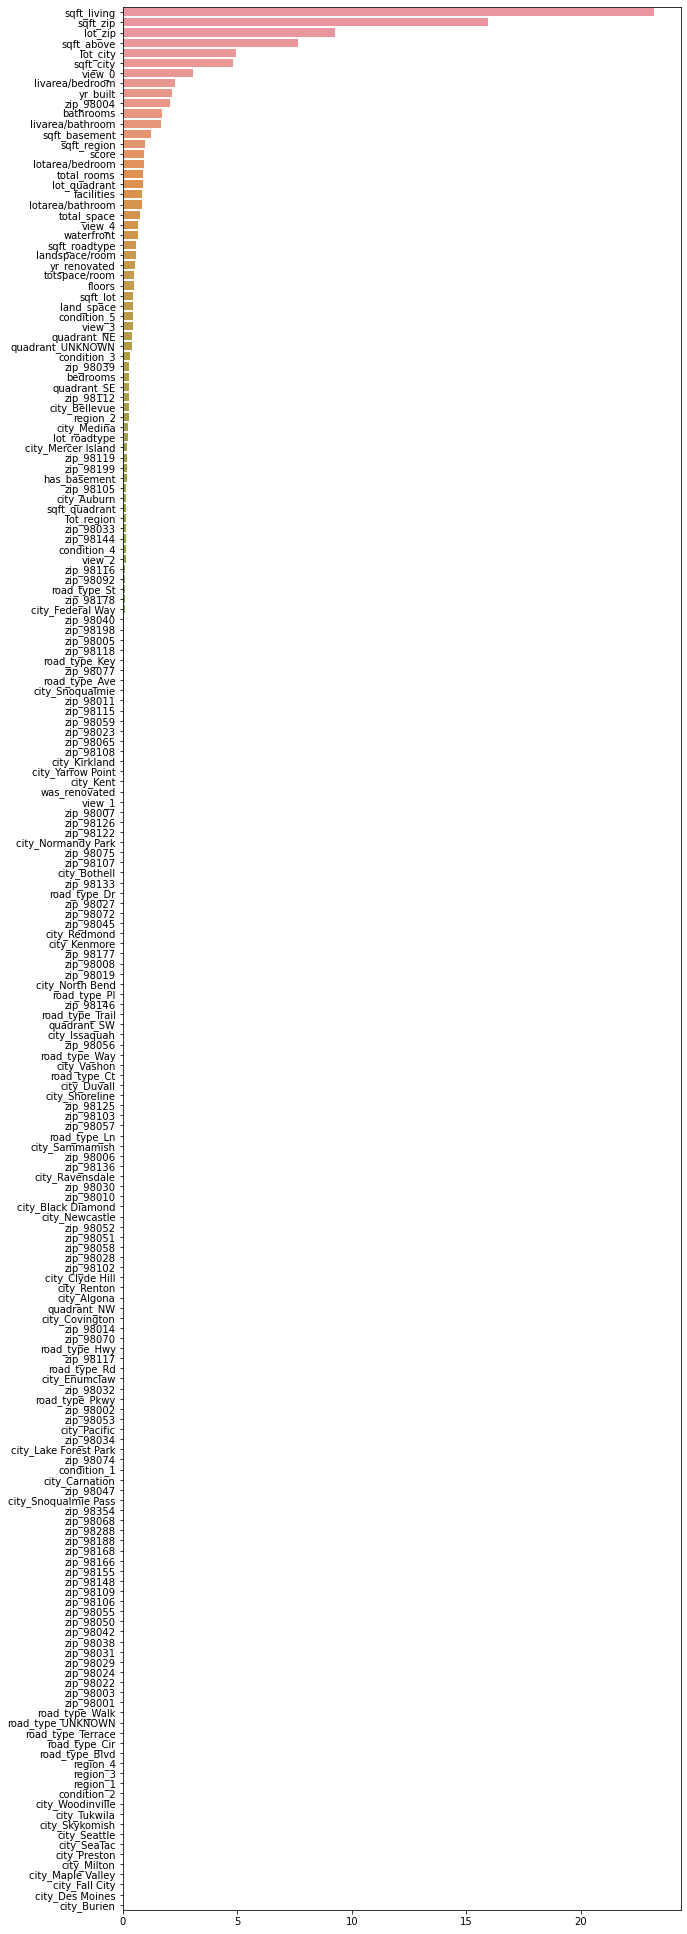

In [55]:
forest = CatBoostRegressor(random_state=42, verbose=0)
forest.fit(prepared_train,train_target)
importances = sorted(list(zip(forest.feature_importances_,all_feats)),reverse=True)
x_axis = [x[0] for x in importances]
y_axis = [x[1] for x in importances]
plt.figure(figsize=(10,35))
sns.barplot(x=x_axis,y=y_axis);

- The Livable area of a house is a huge predictor of its price.

- Some of our engineered features are top predictors. Most of the top predictors can be classified into **size**, **location**, **condition**, and **facilities**

These are what a buyer might think about before deciding to purchase a property.

Since most of the features contribute very little to price. Let's train our models on the top 60 features.

In [56]:
top_feats = y_axis 

In [57]:
class Select(BaseEstimator,TransformerMixin):
    def __init__(self,n=60):
        self.n=n
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):   
        # get the indices of the top n features
        indices = []
        for feat in top_feats[:self.n]:
            indices.append(all_feats.index(feat))
        return X[:,indices]

In [58]:
# redefine the preprocessor    
preprocessor = Pipeline([('adder',Add_attr()),
                         ('scaler_encoder',num_and_cat),
                         ('selector',Select())])

In [59]:
prepared_train = preprocessor.fit_transform(X_train)
train_target = y_train

# get train scores
for model in models:
    model.fit(prepared_train,train_target)
    train_predictions = model.predict(prepared_train)
    print(f'{model.__class__.__name__}: {mae(train_target,train_predictions)}') 

LinearRegression: 114157.65019586959
Lasso: 115154.93880393739
DecisionTreeRegressor: 16.41747288185283
RandomForestRegressor: 34912.79844857795
ExtraTreesRegressor: 16.41747288186036
GradientBoostingRegressor: 79994.40652213877
AdaBoostRegressor: 234145.00602116447
XGBRegressor: 23908.311378793078
LGBMRegressor: 54979.106696387054
CatBoostRegressor: 46427.56391386713


In [60]:
# get validation scores
for model in models:
    pipeline = Pipeline([('preprocessor',preprocessor),('model',model)])
    scores = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    scores = np.abs(scores)
    print(f'{model.__class__.__name__}:\n\tMEAN: {np.mean(scores)}\n\tSTD: {np.std(scores)}')

LinearRegression:
	MEAN: 128964.22454490447
	STD: 16710.65512543518
Lasso:
	MEAN: 119819.26285004558
	STD: 5471.284245550649
DecisionTreeRegressor:
	MEAN: 138818.43419242406
	STD: 9272.453626933044
RandomForestRegressor:
	MEAN: 97896.4880063308
	STD: 3380.9967954263116
ExtraTreesRegressor:
	MEAN: 93606.79802621293
	STD: 5552.759726432031
GradientBoostingRegressor:
	MEAN: 100888.81710270079
	STD: 3768.581501665579
AdaBoostRegressor:
	MEAN: 242050.26148712682
	STD: 13443.903123687214
XGBRegressor:
	MEAN: 99367.69775441167
	STD: 4267.021238584986
LGBMRegressor:
	MEAN: 94918.10743452403
	STD: 2694.112557097428
CatBoostRegressor:
	MEAN: 88869.73363230505
	STD: 4948.157473929257


The CatBoost Regressor gives a similar result to when all features were used.

# 6. Averaging and Stacking Best Models

Let's test the performance of the best performing models on the test set

In [61]:
best_models = [CatBoostRegressor(random_state=42,verbose=0),
              ExtraTreesRegressor(random_state=42),
              LGBMRegressor(random_state=42)]

# fit the preprocessor on the train set
prepared_train = preprocessor.fit_transform(X_train)
train_target = y_train

# transform the test set and seperate the target
prepared_test = preprocessor.transform(X_test)
test_target = y_test

# get the mae on the test set for each model
for model in best_models:
    model.fit(prepared_train,train_target)
    test_predictions = model.predict(prepared_test)
    print(f'{model.__class__.__name__}: {mae(test_target,test_predictions)}') 

CatBoostRegressor: 92680.76815809253
ExtraTreesRegressor: 101697.42381393546
LGBMRegressor: 102807.24602015503


Yet again, CatBoost gives the best performance

## Averaging

Let's average the predictions across the models and evaluate the performance

In [62]:
cat_preds = best_models[0].predict(prepared_test)
etrees_preds = best_models[1].predict(prepared_test)
lgbm_preds = best_models[2].predict(prepared_test)
average_preds = (cat_preds+etrees_preds+lgbm_preds)/3
mae(test_target,average_preds)

94927.70759866145

The average predictor doesn't perform as well as CatBoostRegressor. Let's try a meta learner. We'll train the meta learner on train predictions before evaluating on the test predictions.

In [63]:
meta_learner = LinearRegression()
cat_train = best_models[0].predict(prepared_train)
etrees_train = best_models[1].predict(prepared_train)
lgbm_train = best_models[2].predict(prepared_train)

In [64]:
train_preds = np.c_[cat_train,etrees_train,lgbm_train]
meta_learner.fit(train_preds,train_target)
test_preds = np.c_[cat_preds,etrees_preds,lgbm_preds]
final_preds = meta_learner.predict(test_preds)
mae(test_target,final_preds)

101697.42381393541

The meta learner performs worse than the averaging model

# 7. Conclusion

- **CatboostRegressor** performs the best on the test set with an average error of 92,000. This is a decent performance given that the average house price in the dataset is about 550,000


- House buyers are mostly concerned about **Size**, **Location**, **Condition**, and **Facilities** when deciding on which property to purchase.

# 8. Next Steps

- The models could benefit from hyperparameters tuning
- Wrapping everything in docker to make the work reproducible
- Productionizing the final model